In [ ]:
import numpy as np #NumPy library, a fundamental package for numerical computations
import pandas as pd #Pandas library,used for data manipulation and analysis, particularly with data structures like dataframes.
import matplotlib.pyplot as plt  #Matplotlib library,visualization library
import seaborn as sns  #A data visualization library built on top of Matplotlib
from sklearn.model_selection import train_test_split #Imports the train_test_split function from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
iris = pd.read_csv("/content/Iris flower.zip")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
iris.duplicated().any()

True

In [ ]:
duplicate_count = iris.duplicated().sum()
print("Total Duplicate Record:", duplicate_count)

Total Duplicate Record: 3


In [ ]:
iris.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


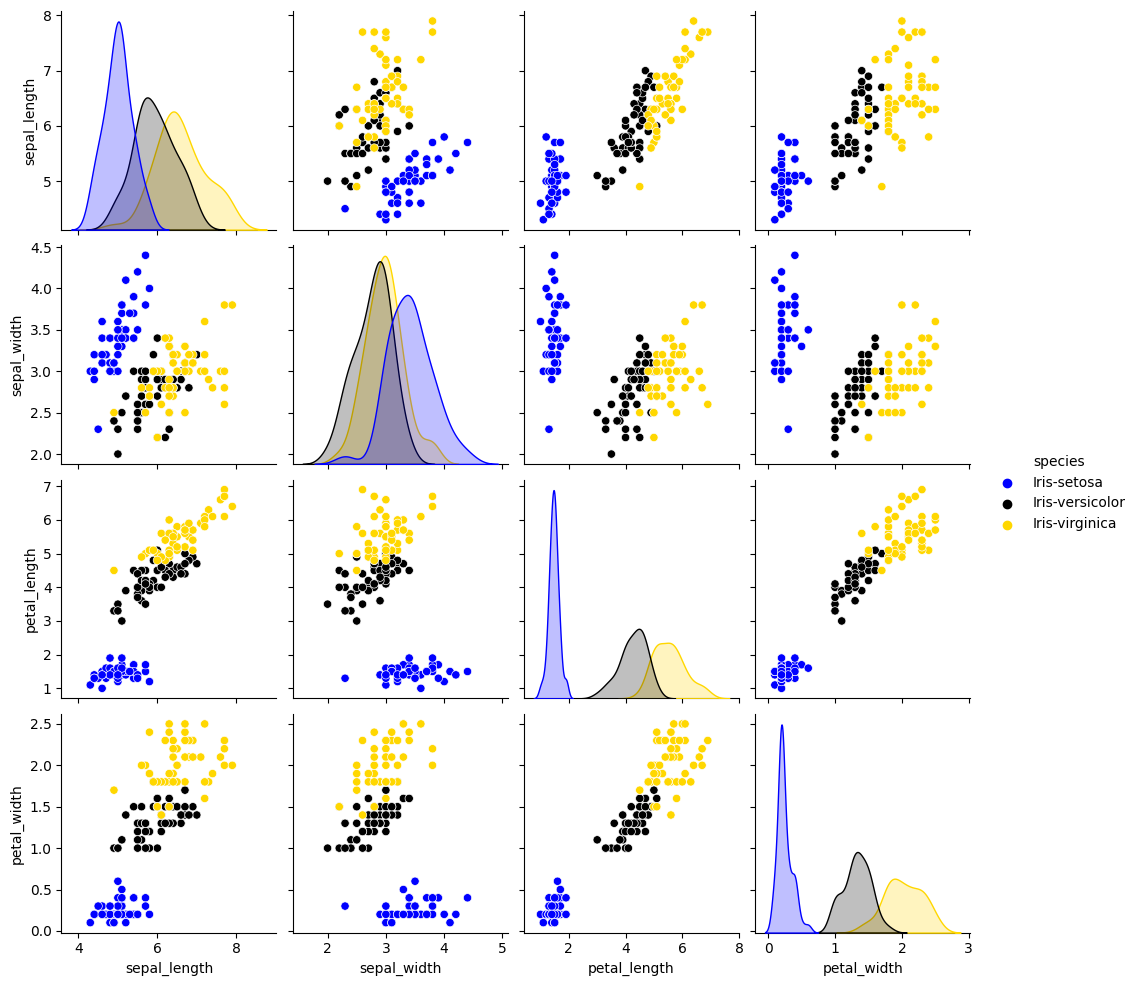

In [ ]:
sns.pairplot(iris, hue="species", palette={"Iris-setosa": "blue", "Iris-versicolor": "black", "Iris-virginica": "gold"})
plt.show()

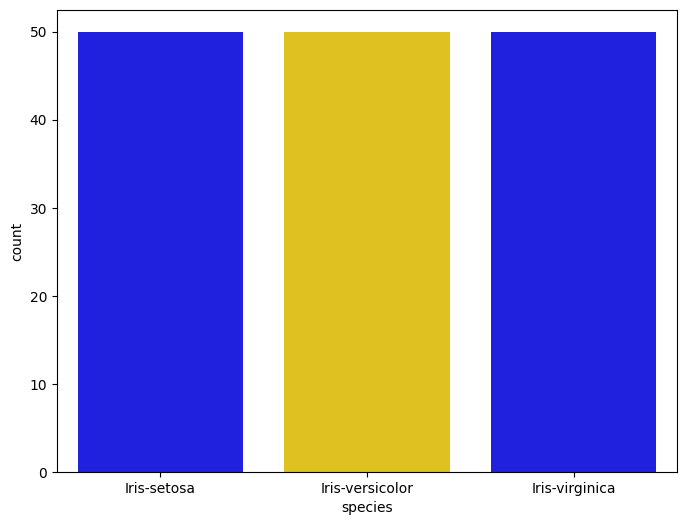

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="species", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "blue"})
plt.show()

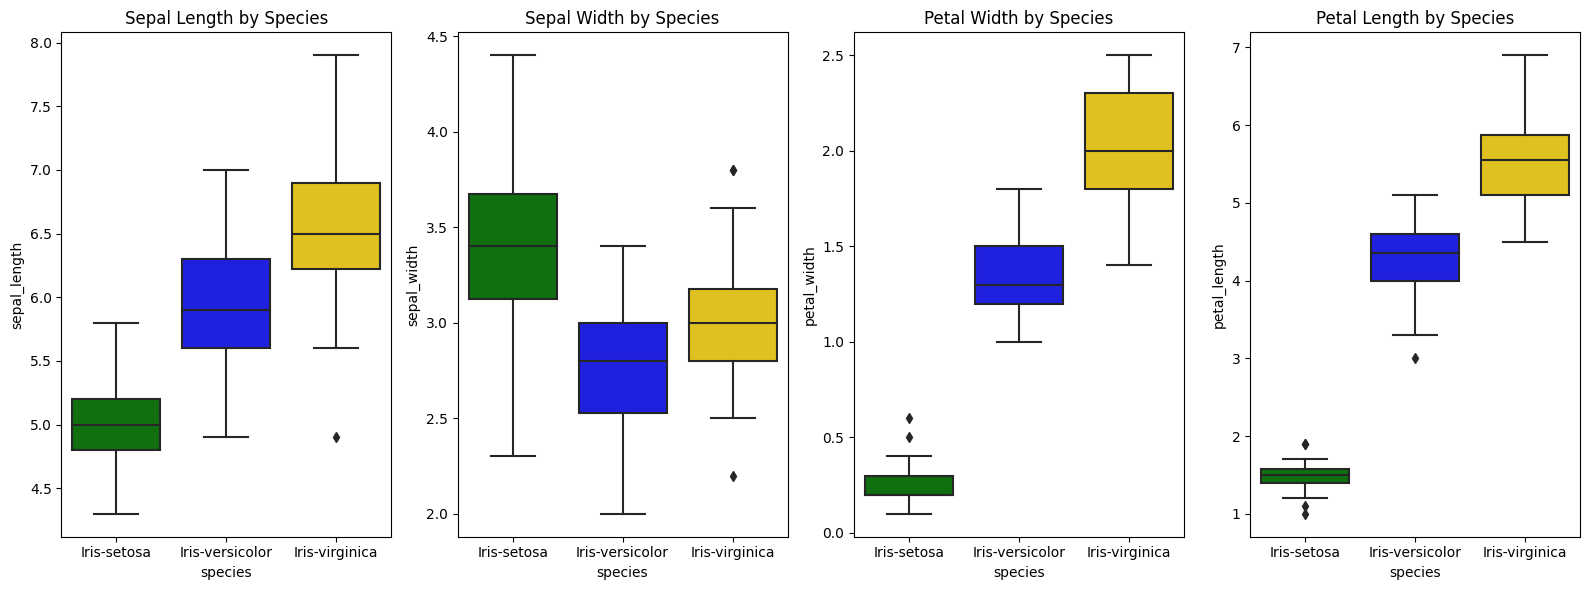

In [ ]:
plt.figure(figsize=(16, 6))

# Box Plot for Sepal Length
plt.subplot(141)
sns.boxplot(x="species", y="sepal_length", data=iris, palette={"Iris-setosa": "green", "Iris-versicolor": "blue", "Iris-virginica": "gold"})
plt.title("Sepal Length by Species")

# Box Plot for Sepal Width
plt.subplot(142)
sns.boxplot(x="species", y="sepal_width", data=iris, palette={"Iris-setosa": "green", "Iris-versicolor": "blue", "Iris-virginica": "gold"})
plt.title("Sepal Width by Species")

# Box Plot for Petal Width
plt.subplot(143)
sns.boxplot(x="species", y="petal_width", data=iris, palette={"Iris-setosa": "green", "Iris-versicolor": "blue", "Iris-virginica": "gold"})
plt.title("Petal Width by Species")

# Box Plot for Petal Length
plt.subplot(144)
sns.boxplot(x="species", y="petal_length", data=iris, palette={"Iris-setosa": "green", "Iris-versicolor": "blue", "Iris-virginica": "gold"})
plt.title("Petal Length by Species")

plt.tight_layout()
plt.show()


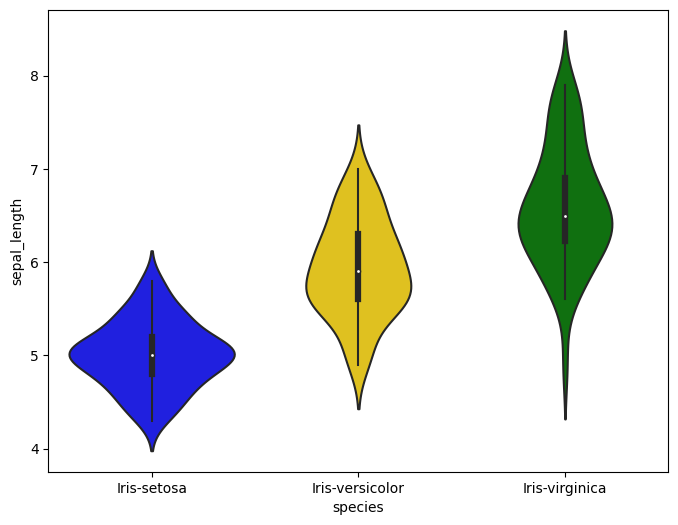

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="sepal_length", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "green"})
plt.show()

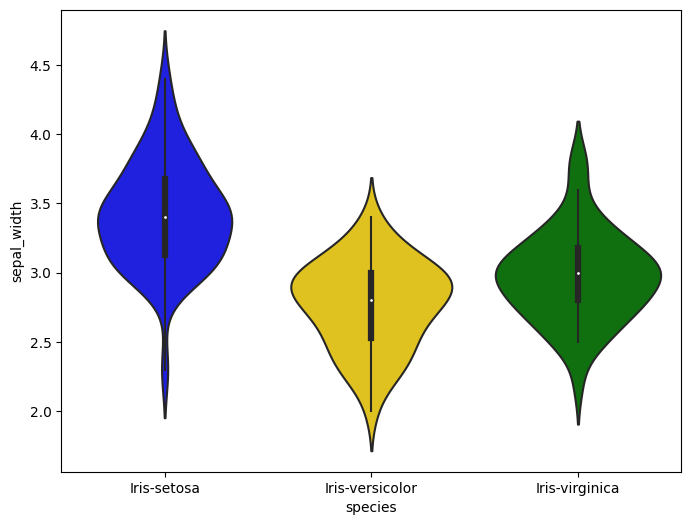

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="sepal_width", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "green"})
plt.show()

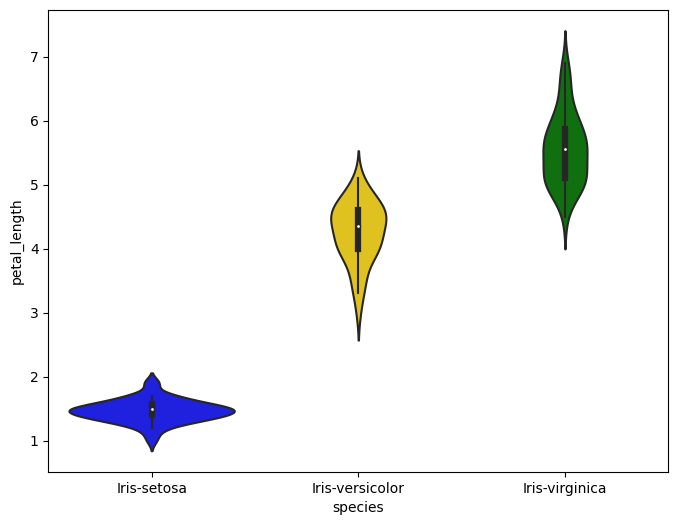

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="petal_length", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "green"})
plt.show()

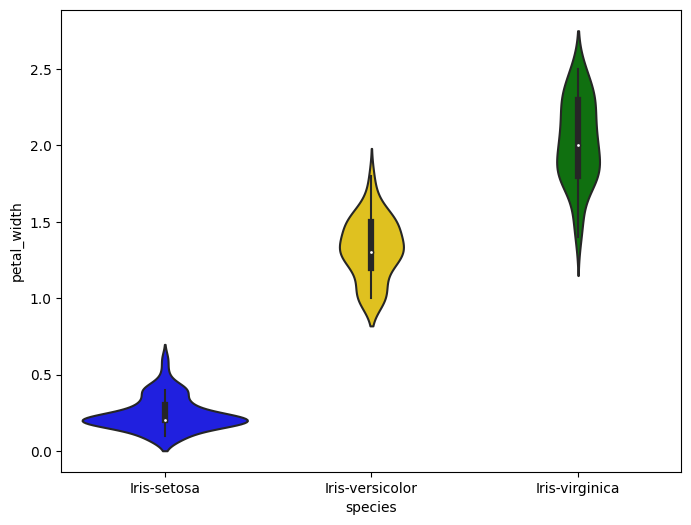

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="petal_width", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "green"})
plt.show()

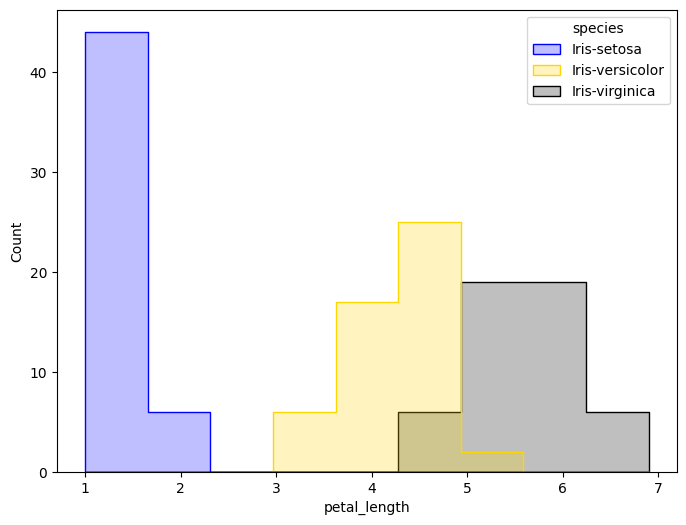

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=iris, x="petal_length", hue="species", element="step", common_norm=False, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "black"})
plt.show()

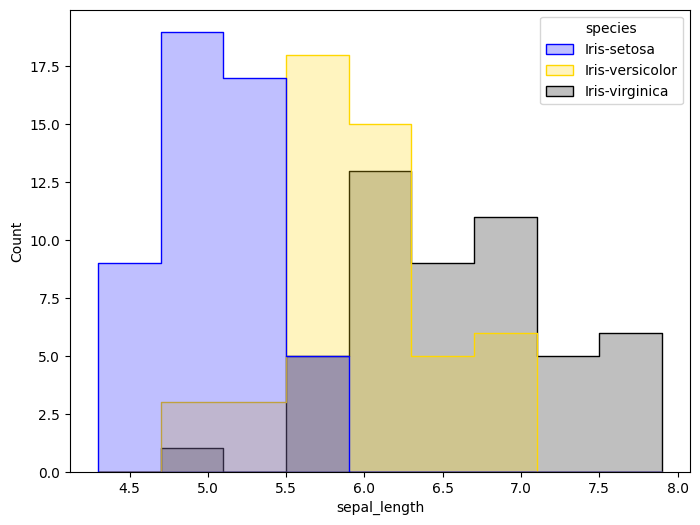

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=iris, x="sepal_length", hue="species", element="step", common_norm=False, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "black"})
plt.show()

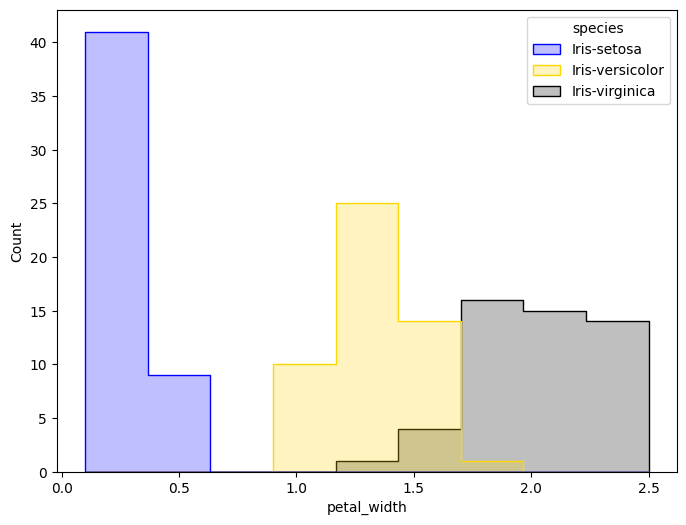

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=iris, x="petal_width", hue="species", element="step", common_norm=False, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "black"})
plt.show()

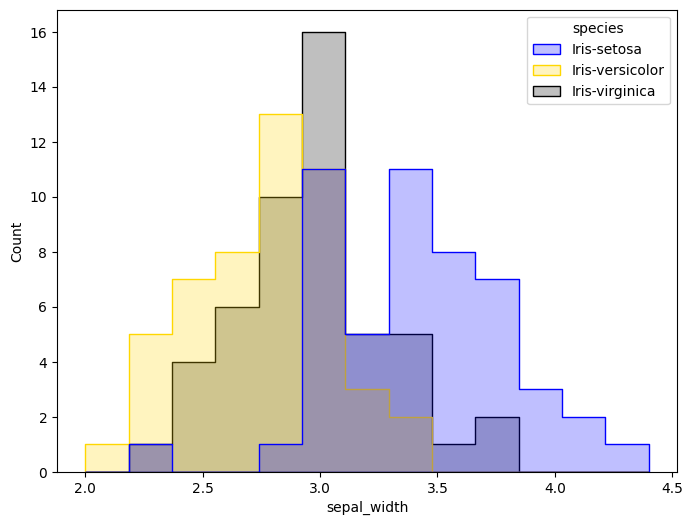

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=iris, x="sepal_width", hue="species", element="step", common_norm=False, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "black"})
plt.show()

In [ ]:
x=iris.iloc[:,:4]
y=iris.iloc[:,4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [ ]:
y_pred = model_lg.predict(x_test)
y_pred_svm = rf_model.predict(x_test)
y_pred_knn = model_svm.predict(x_test)
y_pred_dt = model_knn.predict(x_test)
y_pred_rf = model_dt.predict(x_test)
y_pred_nn = model_nn.predict(x_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted_LR': y_pred, 'Predicted_RF': y_pred_rf,
                           'Predicted_SVM': y_pred_svm, 'Predicted_KNN': y_pred_knn,
                           'Predicted_DT': y_pred_dt, 'Predicted_NN':y_pred_nn})

print(results_df)

NameError: ignored